In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The data

In [2]:
from tensorflow.keras.datasets import mnist

2024-01-08 14:13:03.909086: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/schanlar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

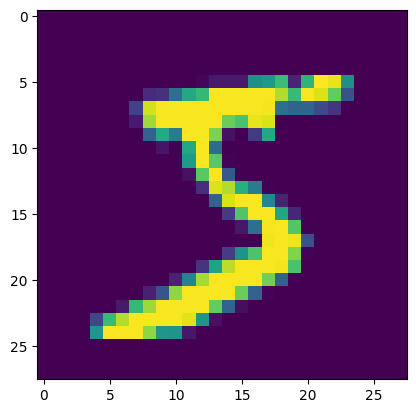

In [4]:
_ = plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

## AutoEncoder for Denoising Images

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GaussianNoise

In [7]:
gaussian_noise = GaussianNoise(0.2)

In [8]:
noisey = gaussian_noise(X_test[0:2],training=True)

ORIGINAL IMAGE


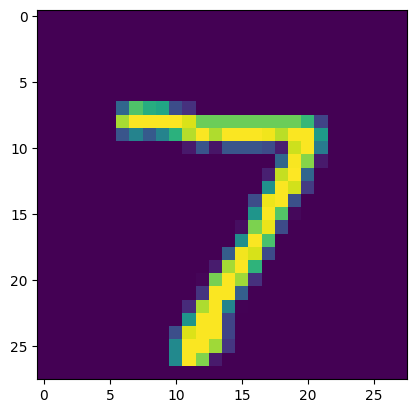

IMAGE WITH ADDED NOISE


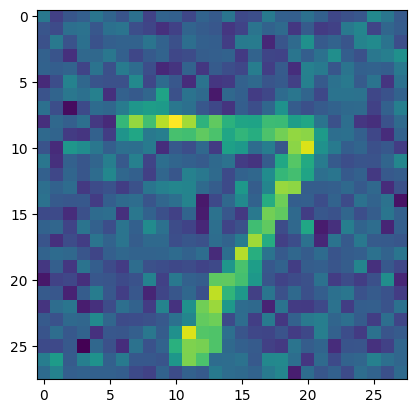

In [9]:
print("ORIGINAL IMAGE")
plt.imshow(X_test[0])
plt.show()
print("IMAGE WITH ADDED NOISE")
plt.imshow(noisey[0])
plt.show()

### Create  noise removal autoencoder and train it.

In [10]:
# tf.random.set_seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [11]:
decoder = Sequential()

decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))

decoder.add(Reshape([28, 28]))

In [12]:
noise_remover = Sequential([encoder, decoder])

In [13]:
noise_remover.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [14]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=[X_test, X_test])

Epoch 1/8
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1728 - accuracy: 0.1782 - val_loss: 0.1360 - val_accuracy: 0.2289
Epoch 2/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1316 - accuracy: 0.2295 - val_loss: 0.1223 - val_accuracy: 0.2352
Epoch 3/8
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1219 - accuracy: 0.2444 - val_loss: 0.1162 - val_accuracy: 0.2562
Epoch 4/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1156 - accuracy: 0.2544 - val_loss: 0.1096 - val_accuracy: 0.2636
Epoch 5/8
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1118 - accuracy: 0.2621 - val_loss: 0.1067 - val_accuracy: 0.2589
Epoch 6/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1094 - accuracy: 0.2656 - val_loss: 0.1049 - val_accuracy: 0.2736
Epoch 7/8
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1076 - accuracy: 0.2698 - val_loss: 0.1028 - val_ac

In [15]:
noisey_images_sample = gaussian_noise(X_test[0:10],training=True)

denoised_images_sample = noise_remover(noisey_images_sample[0:10])

The Original


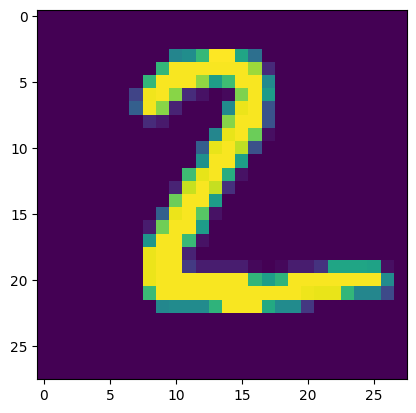

The Noisey Version


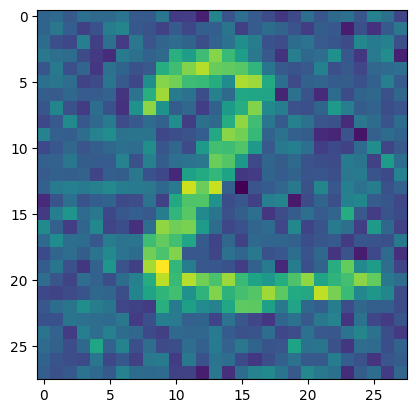

After going through denoiser


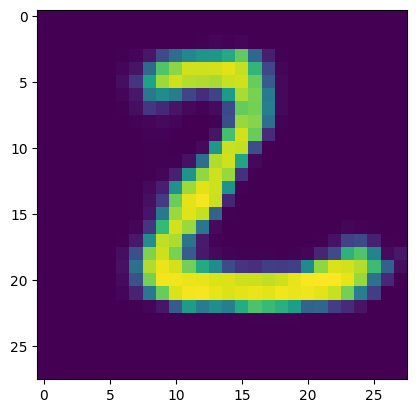

In [16]:
n = 1

print("The Original")
plt.imshow(X_test[n])
plt.show()

print("The Noisey Version")
plt.imshow(noisey_images_sample[n])
plt.show()

print("After going through denoiser")
plt.imshow(denoised_images_sample[n])
plt.show()